## Coupon Acceptance Analysis

This notebook analyzes factors influencing coupon acceptance rates for different types of coupons.

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

#### Setup and Data Loading:
##### Import Libraries
To start data cleaning and manipulation, we are going to import and install some helper libraries that we will need to process the data.

In [415]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Problems

We will use the following prompts or questions below to get started with our data analysis.  

##### 1. Read in the `coupons.csv` file.




##### Load Dataset
Next, we are going to load the dataset and examine its structure such as shape, column names, data types and so on.

In [418]:
data = pd.read_csv('coupons.csv')
print(f"Dataset shape: {data.shape}")
print("First few rows of the dataset:")
data.head(5)

Dataset shape: (12684, 26)
First few rows of the dataset:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [420]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Cleaning and Preprocessing:
##### Check for Duplicates and Identify Missing Values
Next, we will check for duplicate rows to ensure that each row is unique and avoid any redundancy in the dataset.

##### 2. Investigate the dataset for missing or problematic data.

In [423]:
# Check for duplicate records
print(f"Number of duplicate records: {data.duplicated().sum()}")

# Remove duplicate records
data = data.drop_duplicates()
print(f'Total number of unique records after removing duplicates: {data.shape[0]}')

Number of duplicate records: 74
Total number of unique records after removing duplicates: 12610


In [424]:
# Check for missing values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

##### 3. Decide what to do about your missing data -- drop, replace, other...

Based on the above, we can observe that there are only a few columns with missing values between 1% - 2% of the entire dataset (except for 'car' which has approximately every values as missing). 

How we handle missing values in a dataset is important and there are few options to best deal with them such as drop any rows or columns that contain missing data but this can result in loss of potentially useful data. Another option is we impute the missing values using techniques like mean or median imputation.

In our case, we will remove them since removing them will not be a loss of any valuable information and will not significantly affect our analysis.is.

In [427]:
# Drop rows with missing values
data_cleaned = data.dropna()

#### Overall Coupon Acceptance Analysis

##### 4. What proportion of the total observations chose to accept the coupon? 

In [430]:
acceptance_rate = data['Y'].mean()
print(f"Coupon acceptance rate: {acceptance_rate:.2%}")

Coupon acceptance rate: 56.76%


##### 5. Use a bar plot to visualize the `coupon` column.

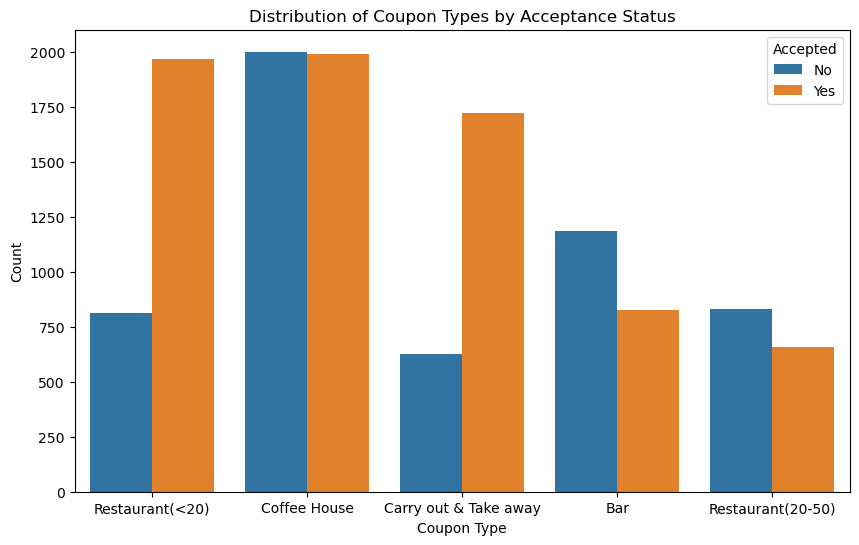

In [432]:
# Convert 'Y' to categorical and provide labels
data['Y_cat'] = pd.Categorical(data['Y'].map({0: 'No', 1: 'Yes'}))

# Visualize the coupon column with acceptance status
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', hue='Y_cat', data=data)
plt.title('Distribution of Coupon Types by Acceptance Status')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

##### Key Insights:
1. The most common coupons are the Restaurant(<20), followed by Coffee House coupons.
2. Bar coupons have the lowest acceptance rate followed by Restaurant(20-50) coupons.
3. Carry out & Take away coupons have the highest acceptance rate followed by Restaurant(<20) coupons.

##### 6. Use a histogram to visualize the temperature column.

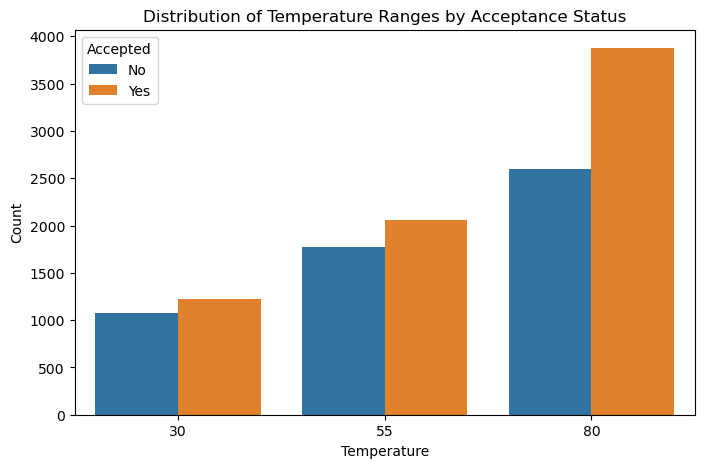

In [435]:
# Visualize the temperature column with acceptance status
plt.figure(figsize=(8, 5))
sns.countplot(x='temperature', hue='Y_cat', data=data)
plt.title('Distribution of Temperature Ranges by Acceptance Status')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

##### Key Insights:
1. The temperature distribution seems to be trimodal, with temperature peaking at 30°F, 55°F, and 80°F respectively.
2. The acceptance rates of the coupons seems to be higher at warmer temperatures (80°F).

#### Bar Coupon Analysis

**Investigating the Bar Coupons**

Now, we will explore just the bar related coupons.  

##### 1. Create a new `DataFrame` that contains just the bar coupons.


In [439]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()

##### 2. What proportion of bar coupons were accepted?

In [441]:
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Bar coupon acceptance rate: {bar_acceptance_rate:.2%}")

Bar coupon acceptance rate: 41.00%


##### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [443]:
def bar_visits(visits):
    return '3 or fewer' if visits in ['never', 'less1', '1~3'] else 'more than 3'

bar_coupons.loc[:, 'bar_visits'] = bar_coupons['Bar'].apply(bar_visits)

acceptance_by_visits = bar_coupons.groupby('bar_visits')['Y'].mean()
print("Acceptance rate by bar visit frequency:")
print(acceptance_by_visits)

Acceptance rate by bar visit frequency:
bar_visits
3 or fewer     0.370391
more than 3    0.731818
Name: Y, dtype: float64


In [444]:
# Let's define a function to visualize the results
def plot_acceptance_rate(data, x_label, title):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=data.index, y=data.values, palette="YlOrRd")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Acceptance Rate')
    plt.tight_layout()
    plt.show()

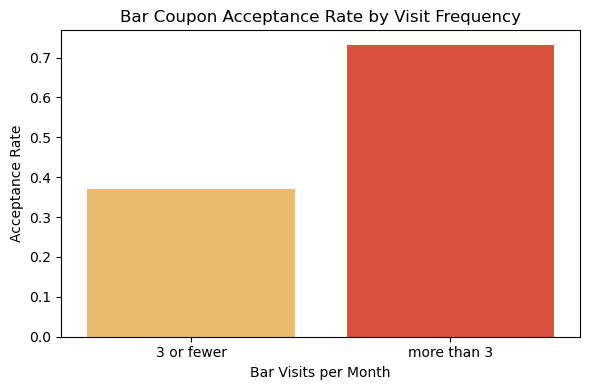

In [445]:
plot_acceptance_rate(acceptance_by_visits, 'Bar Visits per Month', 'Bar Coupon Acceptance Rate by Visit Frequency')

##### Key Insight:
Drivers who go to bars more frequently (more than 3 times a month) are much more likely to accept bar coupons (73.2% vs 37.0%).

##### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [448]:
def driver_category(row):
    if row['Bar'] not in ['never', 'less1'] and row['age'] > '25':
        return 'frequent and over 25'
    else:
        return 'others'

bar_coupons['driver_cat'] = bar_coupons.apply(driver_category, axis=1)

acceptance_by_driver_cat = bar_coupons.groupby('driver_cat')['Y'].mean()
print("Acceptance rate by driver category:")
print(acceptance_by_driver_cat)

Acceptance rate by driver category:
driver_cat
frequent and over 25    0.675556
others                  0.333333
Name: Y, dtype: float64


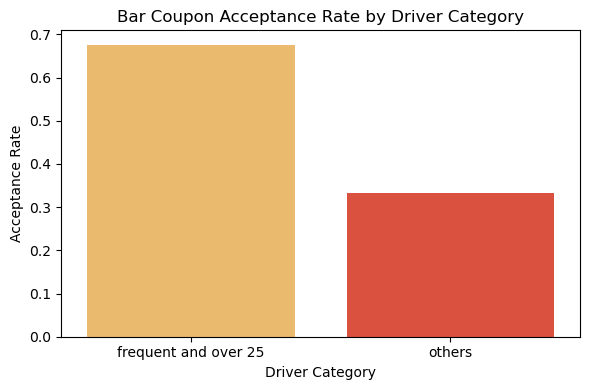

In [449]:
plot_acceptance_rate(acceptance_by_driver_cat, 'Driver Category', 'Bar Coupon Acceptance Rate by Driver Category')

##### Key Insight:
Drivers who are over 25 and frequent bar-goers have a significantly higher acceptance rate (67.6% vs 33.3%).

##### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [452]:
def specific_group(row):
    if (row['Bar'] not in ['never', 'less1'] and 
        row['passanger'] != 'Kid(s)' and 
        row['occupation'] != 'Farming Fishing & Forestry'):
        return 'target group'
    else:
        return 'others'

bar_coupons['specific_group'] = bar_coupons.apply(specific_group, axis=1)

acceptance_by_specific_group = bar_coupons.groupby('specific_group')['Y'].mean()
print("Acceptance rate by specific group:")
print(acceptance_by_specific_group)

Acceptance rate by specific group:
specific_group
others          0.294240
target group    0.702988
Name: Y, dtype: float64


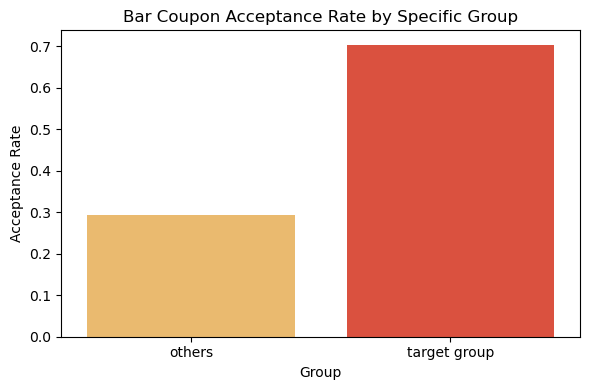

In [453]:
plot_acceptance_rate(acceptance_by_specific_group, 'Group', 'Bar Coupon Acceptance Rate by Specific Group')

##### Key Insight:
Drivers who go to bars more than once a month, don't have kids as passengers, and don't work in farming, fishing, or forestry have a significantly higher acceptance rate for bar coupons (70.3%) compared to others (29.4%). 

##### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [456]:
def combined_group(row):
    condition1 = (row['Bar'] not in ['never', 'less1']) and \
                 (row['passanger'] != 'Kid(s)') and \
                 (row['maritalStatus'] != 'Widowed')
    condition2 = (row['Bar'] not in ['never', 'less1']) and \
                 (row['age'] in ['below21', '21', '26'])
    condition3 = (row['RestaurantLessThan20'] in ['4~8', 'gt8']) and \
                 (row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
    
    return 'combined_group' if (condition1 or condition2 or condition3) else 'others'

bar_coupons['combined_group'] = bar_coupons.apply(combined_group, axis=1)

acceptance_by_combined_group = bar_coupons.groupby('combined_group')['Y'].mean()
print("Acceptance rate by combined group:")
print(acceptance_by_combined_group)


Acceptance rate by combined group:
combined_group
combined_group    0.587342
others            0.295082
Name: Y, dtype: float64


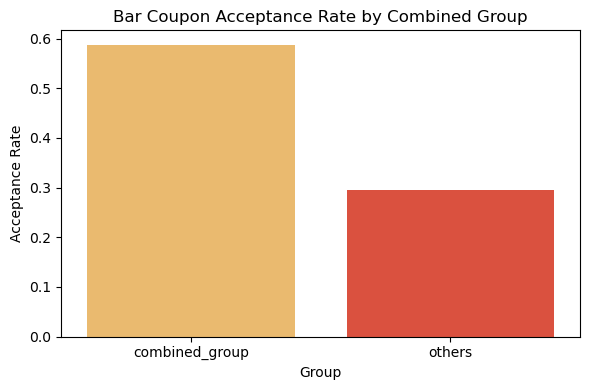

In [457]:
plot_acceptance_rate(acceptance_by_combined_group, 'Group', 'Bar Coupon Acceptance Rate by Combined Group')

##### Key Insight:
The combined group (frequent bar-goers not with kids, under 30, or lower income frequent restaurant-goers) has a much higher acceptance rate (58.7% vs 29.5%).

##### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above observations, we can hypothesize that:
1. The frequency of bar visits is a pretty strong predictor of bar coupon acceptance.
2. Age and lifestyle factors such as not having kids or being unmarried also play an important role.
3. Income and dining habits may influence coupon acceptance, with lower-income frequent diners more likely to accept coupons.

### Independent Investigation

Using the bar coupon example as motivation, let's explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [462]:
# We will choose another coupon type such as Coffee House
coffee_coupons = data[data['coupon'] == 'Coffee House'].copy()

# Analyze acceptance rate
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"Coffee House acceptance rate: {coffee_acceptance_rate:.2%}")

Coffee House acceptance rate: 49.86%


In [463]:
def coffee_consumption_category(visits):
    return 'frequent' if visits in ['4~8', 'gt8'] else 'infrequent'

coffee_coupons['coffee_consumption'] = coffee_coupons['CoffeeHouse'].apply(coffee_consumption_category)

# Analyze acceptance rates based on these factors
acceptance_by_consumption = coffee_coupons.groupby('coffee_consumption')['Y'].mean()
print("Acceptance rate by coffee consumption:")
print(acceptance_by_consumption)

Acceptance rate by coffee consumption:
coffee_consumption
frequent      0.675000
infrequent    0.448697
Name: Y, dtype: float64


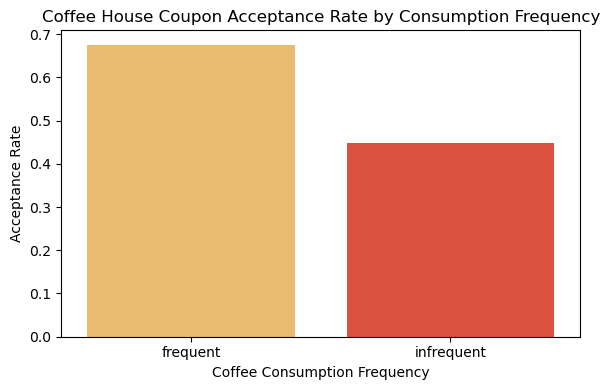

In [464]:
plot_acceptance_rate(acceptance_by_consumption, 'Coffee Consumption Frequency', 'Coffee House Coupon Acceptance Rate by Consumption Frequency')

##### Key Insight:
Similar to bar coupons, the frequency of coffee house visits is a also strong predictor of coupon acceptance. Frequent coffee drinkers (4 or more times a month) are much more likely to accept coffee house coupons (67.5% acceptance rate) compared to infrequent visitors (44.9% acceptance rate).

##### Acceptance Rate by Time of Day

Acceptance rate by time of day:
time
10AM    0.640312
10PM    0.424242
2PM     0.547289
6PM     0.410846
7AM     0.445783
Name: Y, dtype: float64


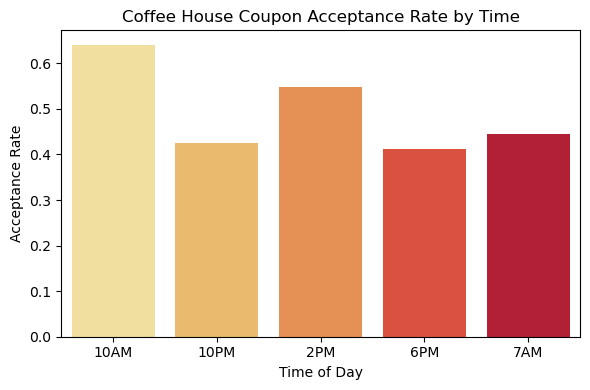

In [467]:
# Analyze acceptance rate by time of day
acceptance_by_time = coffee_coupons.groupby('time')['Y'].mean()
print("Acceptance rate by time of day:")
print(acceptance_by_time)

plot_acceptance_rate(acceptance_by_time, 'Time of Day', 'Coffee House Coupon Acceptance Rate by Time')

##### Key Insight:
We can see that coffee house coupon acceptance rates vary significantly by time of day. They are highest in the morning (64.0% at 10AM) and lowest in the evening (41.1% at 6PM). This indicates that drivers are more likely to accept coffee coupons earlier in the day, which aligns well with typical coffee consumption patterns.

##### Acceptance Rate by Weather

Acceptance rate by weather:
weather
Rainy    0.522124
Snowy    0.433775
Sunny    0.502745
Name: Y, dtype: float64


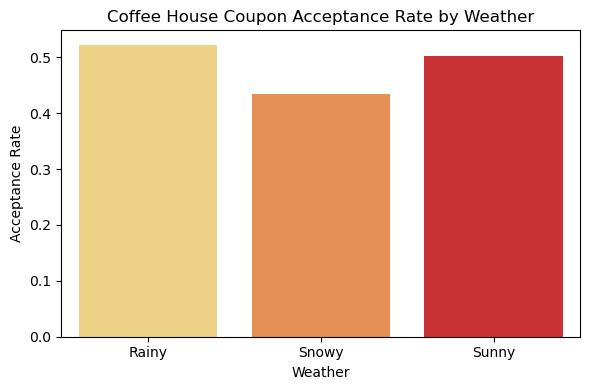

In [470]:
# Analyze acceptance rate by weather
acceptance_by_weather = coffee_coupons.groupby('weather')['Y'].mean()
print("Acceptance rate by weather:")
print(acceptance_by_weather)

plot_acceptance_rate(acceptance_by_weather, 'Weather', 'Coffee House Coupon Acceptance Rate by Weather')

##### Key Insight:
Here what's interesting is that rainy weather seems to slightly increase the likelihood of accepting coffee house coupons (52.2% acceptance rate) compared to sunny (50.3%) or snowy (43.4%) weather. This could also be due to people who want some comfort or warmth in the coffee shops during rainy days.

##### Acceptance Rate by Age Group

Acceptance rate by age group:
age
21         0.524349
26         0.514828
31         0.474194
36         0.467662
41         0.501538
46         0.509259
50plus     0.420183
below21    0.696774
Name: Y, dtype: float64


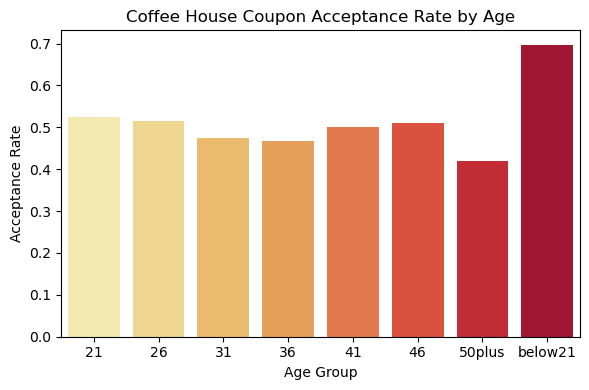

In [473]:
# Analyze acceptance rate by age group
acceptance_by_age = coffee_coupons.groupby('age')['Y'].mean()
print("Acceptance rate by age group:")
print(acceptance_by_age)

plot_acceptance_rate(acceptance_by_age, 'Age Group', 'Coffee House Coupon Acceptance Rate by Age')

##### Key Insight:
We can observe that younger drivers, specially those below 21 have the highest acceptance rate for coffee house coupons (69.7%). The acceptance rate generally decreases with age, with the lowest rate among those 50 and older (42.0%). This might possibly suggests that coffee house coupons are more appealing to younger demographics.

Based on the above observations, we can hypothesize that the typical driver who accepts a coffee house coupon is likely to be:
1. A frequent coffee shop visitor and young, possibly under 30 years old.
2. More likely to accept the coupon in the morning or early afternoon and slightly more inclined to accept it on rainy days.